## Walmart MLE Evaluation - Predictive Maintenance

### Data processing

In [7]:
import pandas as pd

In [ ]:
# Get information from failures, telemetry, and machines files.
failures_data = pd.read_csv('Data/PdM_failures.csv')
telemetry_data = pd.read_csv('Data/PdM_telemetry.csv')
machines_data = pd.read_csv('Data/PdM_machines.csv')

In [7]:
failures_data.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [8]:
telemetry_data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [9]:
machines_data.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


The information is merged into a unique dataframe joining by datetime and machine ID. It is expected two states: Machine Failed and Machine qith no failures.

In [10]:
merged_df = pd.merge(telemetry_data, failures_data, on=['datetime', 'machineID'], how='left')

In [18]:
merged_df[merged_df['failure'].isna()]

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,NaN
...,...,...,...,...,...,...,...
876137,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,NaN
876138,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,NaN
876139,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,NaN
876140,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,NaN


In [19]:
merged_machines = pd.merge(merged_df, machines_data, on=['machineID'], how='left')

To get a balanced dataset, it is selected randomly the same number of entries for machines with no failures than with failures.

In [27]:
import random
with_failures = merged_machines[merged_machines['failure'].notna()]
df = merged_machines[merged_machines['failure'].isna()]
index = random.sample(range(len(df)), len(with_failures))
no_failures = df.iloc[index]

In [28]:
no_failures

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age
696875,2015-07-17 02:00:00,80,163.760708,342.572070,85.788053,34.674492,NaN,model3,6
215154,2015-07-23 07:00:00,25,199.126787,413.395231,111.528256,46.651591,NaN,model4,16
37806,2015-04-26 07:00:00,5,177.948385,442.454987,107.282176,41.941368,NaN,model3,2
531203,2015-08-19 01:00:00,61,151.224947,445.273182,102.268474,32.829367,NaN,model4,2
235284,2015-11-08 22:00:00,27,179.999947,462.452023,111.896135,40.883149,NaN,model3,9
...,...,...,...,...,...,...,...,...,...
854719,2015-07-22 18:00:00,98,165.698891,445.790227,95.769015,43.875798,NaN,model2,20
366025,2015-10-11 14:00:00,42,166.896769,417.019457,98.439760,39.135546,NaN,model1,7
291341,2015-04-03 04:00:00,34,184.420212,474.747152,94.099777,40.181061,NaN,model4,10
357318,2015-10-13 20:00:00,41,177.198284,440.995760,85.301947,35.096376,NaN,model4,9


In [29]:
with_failures

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age
96,2015-01-05 06:00:00,1,179.303153,499.777962,111.833028,52.383097,comp4,model3,18
1536,2015-03-06 06:00:00,1,198.257975,456.862342,89.333995,38.671900,comp1,model3,18
2616,2015-04-20 06:00:00,1,180.050801,346.362480,105.661164,39.218055,comp2,model3,18
4056,2015-06-19 06:00:00,1,187.673963,493.005160,105.334392,53.963961,comp4,model3,18
5856,2015-09-02 06:00:00,1,144.094532,409.380150,106.720871,57.454990,comp4,model3,18
...,...,...,...,...,...,...,...,...,...
866588,2015-11-29 06:00:00,99,205.336154,398.728678,116.164197,35.588661,comp3,model1,14
866948,2015-12-14 06:00:00,99,152.143212,394.182739,114.212265,40.852043,comp4,model1,14
868389,2015-02-12 06:00:00,100,226.666914,484.516473,97.521897,53.129437,comp1,model4,5
873429,2015-09-10 06:00:00,100,201.781023,520.820195,90.944571,39.066892,comp1,model4,5


In [ ]:
dataset = pd.concat([no_failures, with_failures], ignore_index=True)
dataset_y = dataset['failure']
dataset_x = dataset[['machineID', 'volt', 'rotate', 'pressure', 'vibration']]
dataset_x

,machineID,volt,rotate,pressure,vibration
0,80,163.760708,342.572070,85.788053,34.674492
1,25,199.126787,413.395231,111.528256,46.651591
2,5,177.948385,442.454987,107.282176,41.941368
3,61,151.224947,445.273182,102.268474,32.829367
4,27,179.999947,462.452023,111.896135,40.883149
...,...,...,...,...,...
1517,99,205.336154,398.728678,116.164197,35.588661
1518,99,152.143212,394.182739,114.212265,40.852043
1519,100,226.666914,484.516473,97.521897,53.129437
1520,100,201.781023,520.820195,90.944571,39.066892


The two states are maped to0 and 1:
0: Machine no failure.
1: Machine failed.

In [ ]:
# Track Data Version
dataset_s = dataset
dataset_s['failure'] = dataset_s['failure'].notna().astype(int).replace({0: 0, 1: 1})
dataset_s.to_csv('Data/PdM_Dataset_Merged.csv', index=False)

In [41]:
dataset_y = dataset_y.notna().astype(int).replace({0: 0, 1: 1})
dataset_y

0       0
1       0
2       0
3       0
4       0
       ..
1517    1
1518    1
1519    1
1520    1
1521    1
Name: failure, Length: 1522, dtype: int64

The dataset is split and the datasets are tracked with DVC.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [9]:
dataset = pd.read_csv('Data/PdM_Dataset_Merged.csv')
dataset_y = dataset['failure']
dataset_x = dataset[['machineID', 'volt', 'rotate', 'pressure', 'vibration']]
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.8, shuffle=True)

In [ ]:
x_train.to_csv('Data/training/x_train.csv', index=False)
y_train.to_csv('Data/training/y_train.csv', index=False)
x_test.to_csv('Data/test/x_test.csv', index=False)
y_test.to_csv('Data/test/y_test.csv', index=False)

In [10]:
x_train

,machineID,volt,rotate,pressure,vibration
1073,42,143.322981,487.028911,111.889113,40.847190
1257,69,156.032489,422.669792,114.749570,54.306788
209,37,193.929905,429.530809,89.848086,40.755399
520,16,177.026807,502.257658,100.630842,50.942252
290,18,165.038340,471.401270,104.317118,34.533751
...,...,...,...,...,...
567,47,159.544860,456.231838,115.752580,46.304162
420,56,146.680638,360.103338,105.993856,31.252944
211,35,165.439061,459.487276,84.850306,41.933097
868,17,158.098828,406.325391,97.001765,59.967174


In [44]:
y_train

1356    1
1510    1
376     0
768     1
448     0
       ..
835     1
474     0
561     0
1387    1
895     1
Name: failure, Length: 1217, dtype: int64

### Experiments - Model selection

The machine learning model's lifecycles are managed with mlflow.
- It was proposed to compare two models: Random Forest and Support Vector Machines.
- The Input Features were: machineID, volt, rotate, pressure, and vibration.
- The Output is the expectation to fail: 0 - No failures, 1 - Machine will fail.
- It was used Grid Search for fine-tuning.

The parameters tuned for each models were tracked in MLflow. The metrics verified were the accuaracy, and F1-Score. The models were versiond in ML Flow too.

In [11]:
import mlflow

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion' : ('gini', 'entropy', 'log_loss'),
    'max_depth' : [None, 2, 5, 10],
    'max_features' : ('sqrt', 'log2', None)
}
rdmf = RandomForestClassifier()
clf = GridSearchCV(rdmf, parameters)
clf.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [None, 2, 5, 10],
                         'max_features': ('sqrt', 'log2', None)})

/home/ruben/Documentos/Codigos/Python/Walmart/venv/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Random_Forest_Model_Optimized_GridSearch' already exists. Creating a new version of this model...
Created version '2' of model 'Random_Forest_Model_Optimized_GridSearch'.


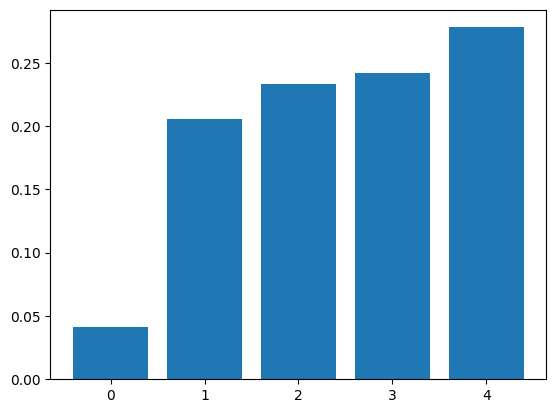

In [29]:
import mlflow.sklearn
import matplotlib.pyplot as plt
from mlflow.models.signature import infer_signature

try:
    experiment_id = mlflow.create_experiment("Machine_Failure_Prediction_Random_Forest_optim")
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name("Machine_Failure_Prediction_Random_Forest_optim").experiment_id

mlflow.set_experiment("Machine_Failure_Prediction_Random_Forest_optim")
with mlflow.start_run(run_name='RandomForest_Optimal_GridSearch'):
    mlflow.log_param('crierion', 'entropy')
    mlflow.log_param('max_depth', 5)
    mlflow.log_param('max_features', 'None')
    
    rdmf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)
    rdmf.fit(x_train, y_train)
    
    y_pred = rdmf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred, target_names=['no_failures', 'with_failures'], output_dict=True)
    
    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('0_f1_score:', rep['no_failures']['f1-score'])
    mlflow.log_metric('1_f1_score:', rep['with_failures']['f1-score'])

    input_example = x_test.iloc[:5].copy()
    signature = infer_signature(x_test, rdmf.predict(x_test))
    mlflow.sklearn.log_model(
        sk_model=rdmf, 
        artifact_path='Random_Forest_Model_Optimized_GridSearch',
        signature=signature,
        input_example=input_example,
        registered_model_name='Random_Forest_Model_Optimized_GridSearch'
        )
    importances = rdmf.feature_importances_
    plt.bar(range(len(importances)), importances)
    plt.savefig('graphs/RF_feature_importances.png')
    mlflow.log_artifact('graphs/RF_feature_importances.png')


In [24]:
print(type(rep))

<class 'str'>


In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ('linear', 'rbf', 'sigmoid'),
    'decision_function_shape' : ('ovo', 'ovr')
}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ('ovo', 'ovr'),
                         'kernel': ('linear', 'rbf', 'sigmoid')})

In [33]:
try:
    experiment_id = mlflow.create_experiment("Machine_Failure_Prediction_SVM_optim")
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name("Machine_Failure_Prediction_SVM_optim").experiment_id
mlflow.set_experiment("Machine_Failure_Prediction_SVM_optim")
with mlflow.start_run(run_name='SVM_Optimal_GridSearch'):
    mlflow.log_param('decision_function_shape', 'ovo')
    mlflow.log_param('kernel', 'linear')

    svc = svm.SVC(decision_function_shape='ovo', kernel='linear')
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred, target_names=['no_failures', 'with_failures'], output_dict=True)

    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('0_f1_score:', rep['no_failures']['f1-score'])
    mlflow.log_metric('1_f1_score:', rep['with_failures']['f1-score'])

    input_example = x_test.iloc[:5].copy()
    signature = infer_signature(x_test, svc.predict(x_test))
    mlflow.sklearn.log_model(
        sk_model=svc, 
        artifact_path='SVM_Model_Optimized_GridSearch',
        signature=signature,
        input_example=input_example,
        registered_model_name='SVM_Model_Optimized_GridSearch'
        )

/home/ruben/Documentos/Codigos/Python/Walmart/venv/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'SVM_Model_Optimized_GridSearch' already exists. Creating a new version of this model...
Created version '2' of model 'SVM_Model_Optimized_GridSearch'.


The model with the best performance (Random Forest) were deployed using a docker image.